In [1]:
import csv

with open('crashes.csv', mode='r') as file:
    reader = csv.DictReader(file)
    crashes = [row for row in reader]

In [2]:
crashes

[{'RD_NO': 'JC113649',
  'CRASH_DATE': '01/12/2019 12:01:00 AM',
  'POSTED_SPEED_LIMIT': '30',
  'TRAFFIC_CONTROL_DEVICE': 'NO CONTROLS',
  'DEVICE_CONDITION': 'NO CONTROLS',
  'WEATHER_CONDITION': 'CLEAR',
  'LIGHTING_CONDITION': 'DARKNESS, LIGHTED ROAD',
  'FIRST_CRASH_TYPE': 'PARKED MOTOR VEHICLE',
  'TRAFFICWAY_TYPE': 'NOT DIVIDED',
  'ALIGNMENT': 'STRAIGHT AND LEVEL',
  'ROADWAY_SURFACE_COND': 'DRY',
  'ROAD_DEFECT': 'NO DEFECTS',
  'REPORT_TYPE': 'ON SCENE',
  'CRASH_TYPE': 'NO INJURY / DRIVE AWAY',
  'DATE_POLICE_NOTIFIED': '01/12/2019 12:01:00 AM',
  'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
  'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
  'STREET_NO': '734',
  'STREET_DIRECTION': 'N',
  'STREET_NAME': 'CENTRAL PARK AVE',
  'BEAT_OF_OCCURRENCE': '1112.0',
  'NUM_UNITS': '6.0',
  'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY',
  'INJURIES_TOTAL': '0.0',
  'INJURIES_FATAL': '0.0',
  'INJURIES_INCAPACITATING': '0.0',
  'INJURIES_NON_INCAPACITATING': '0.0',
  'INJURIES

In [3]:
def replace_nulls(ds, column_name, replacement_value):
    
    for record in ds:
        value = record[column_name].strip().lower() if record[column_name] else None
        
        if value in [None, "", "null", "none"]:
            record[column_name] = replacement_value

In [4]:
def replace_nulls_with_conditions(ds, column_name_to_check, target_value, column_to_replace, replacement_value):
    
    for record in ds:
        if record[column_name_to_check] == target_value and not record[column_to_replace]:
            record[column_to_replace] = replacement_value

In [5]:
def remove_rows_with_nulls(data, attribute):
    
    data[:] = [record for record in data if record.get(attribute) not in [None, "", float("nan")]]


# STREET NAME

la riga che ha missing value in STREET_NAME presenta molti altri null values, ad esempio per gli attributi di latitude, longitude, location, street direction, perciò diventa impossibile risalilre al nome della strada. abbiamo quindi decciso di eliminarla

In [6]:
null_count = 0
for record in crashes:
    if not record["STREET_NAME"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

1


In [7]:
replace_nulls(crashes, 'STREET_NAME', '76TH ST')

In [8]:
null_count = 0
for record in crashes:
    if not record["STREET_NAME"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

0


# MOST SEVERE INJURY

In [9]:
null_count = 0
for record in crashes:
    if not record["MOST_SEVERE_INJURY"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

7


In [10]:
replace_nulls(crashes, 'MOST_SEVERE_INJURY', 'NO INDICATION OF INJURY')

In [11]:
null_count = 0
for record in crashes:
    if not record["MOST_SEVERE_INJURY"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

0


# REPORT TYPE

REPORT_TYPE:

NOT ON SCENE (DESK REPORT)    167961

ON SCENE                       84968

Siccome ci sono solo 5000 report type nulli, possiamo metterli tutti not on scene, perché è sbilanciato

In [12]:
null_count = 0
for record in crashes:
    if not record["REPORT_TYPE"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

4996


In [13]:
replace_nulls(crashes, 'REPORT_TYPE', 'NOT ON SCENE (DESK REPORT)')

In [14]:
null_count = 0
for record in crashes:
    if not record["REPORT_TYPE"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

0


# STREET DIRECTION

Le due strade che non hanno un valore nullo nella direzione hanno un solo valore possibile

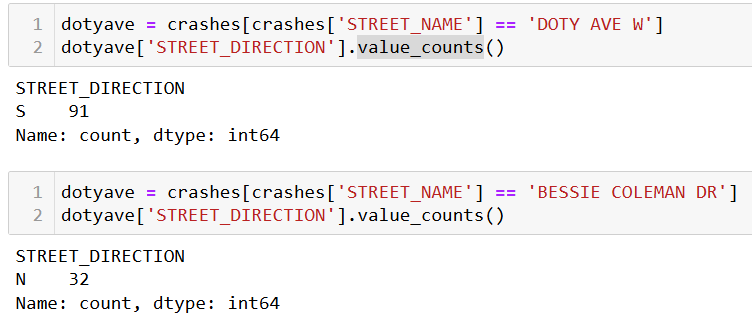

In [15]:
null_count = 0
for record in crashes:
    if not record["STREET_DIRECTION"]:  
        null_count += 1
print(null_count)

2


In [16]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'DOTY AVE W', 'STREET_DIRECTION', 'S')

In [17]:
null_count = 0
for record in crashes:
    if not record["STREET_DIRECTION"]: 
        null_count += 1
print(null_count)

1


In [18]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'BESSIE COLEMAN DR', 'STREET_DIRECTION', 'N')

In [19]:
null_count = 0
for record in crashes:
    if not record["STREET_DIRECTION"]: 
        null_count += 1
print(null_count)

0


# BEAT OF OCCURRENCE 

In [20]:
null_count = 0
for record in crashes:
    if not record["BEAT_OF_OCCURRENCE"]:  
        null_count += 1
print(null_count)

4


In [21]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.614552135332 41.780148264311)', 'BEAT_OF_OCCURRENCE', 312.0)

In [22]:
null_count = 0
for record in crashes:
    if not record["BEAT_OF_OCCURRENCE"]:  
        null_count += 1
print(null_count)

3


In [23]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.653621088745 41.786811402722)', 'BEAT_OF_OCCURRENCE', 712.0)

In [24]:
null_count = 0
for record in crashes:
    if not record["BEAT_OF_OCCURRENCE"]:  # Controlla se è None o stringa vuota
        null_count += 1
print(null_count)

2


In [25]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.713896783814 41.994542305274)', 'BEAT_OF_OCCURRENCE', 1711.0)

In [26]:
null_count = 0
for record in crashes:
    if not record["BEAT_OF_OCCURRENCE"]:  
        null_count += 1
print(null_count)

1


In [27]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'BESSIE COLEMAN DR', 'BEAT_OF_OCCURRENCE', 1654.0 )

In [28]:
null_count = 0
for record in crashes:
    if not record["BEAT_OF_OCCURRENCE"]:  
        null_count += 1
print(null_count)

0


# LATITUDE, LONGITUDE AND LOCATION

In [29]:
null_count = 0
for record in crashes:
    if not record["LATITUDE"]:  
        null_count += 1
print(null_count)

1022


In [30]:
!pip install geocoder

In [38]:
from geopy.geocoders import Nominatim
import time

# Configura il geolocalizzatore
geolocator = Nominatim(user_agent="incident_locator")

# Funzione per ottenere latitudine, longitudine e indirizzo completo
def get_lat_lon_location(street_no, street_direction, street_name):
    try:
        # Crea l'indirizzo come stringa
        address = f"{street_no} {street_direction} {street_name}, Chicago, IL"
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude, location.address
    except Exception as e:
        print(f"Errore con l'indirizzo {address}: {e}")
    return None, None, None

# Contatore per il numero di record aggiornati
updated_count = 0

# Itera sui record e sostituisce i valori mancanti
for crash in crashes:
    if not crash.get('LATITUDE') or not crash.get('LONGITUDE') or not crash.get('LOCATION'):
        lat, lon, loc = get_lat_lon_location(crash['STREET_NO'], crash['STREET_DIRECTION'], crash['STREET_NAME'])
        if lat and lon:
            # Aggiorna i valori
            crash['LATITUDE'] = lat
            crash['LONGITUDE'] = lon
            crash['LOCATION'] = loc
            updated_count += 1  # Incrementa il contatore per ogni record aggiornato

        # Pausa per evitare limiti di richiesta
        time.sleep(1)

    # Stampa il numero di record aggiornati finora
if updated_count % 5 == 0:  # Ogni 5 aggiornamenti, stampa il progresso
    print(f"Aggiornato {updated_count} record finora.")

# Risultato finale dopo aver riempito i valori
print(f"Numero totale di record aggiornati: {updated_count}")
print(crashes[:5])  # Mostra i primi 5 record per confermare l'aggiornamento

Numero totale di record aggiornati: 711
[{'RD_NO': 'JC113649', 'CRASH_DATE': '01/12/2019 12:01:00 AM', 'POSTED_SPEED_LIMIT': '30', 'TRAFFIC_CONTROL_DEVICE': 'NO CONTROLS', 'DEVICE_CONDITION': 'NO CONTROLS', 'WEATHER_CONDITION': 'CLEAR', 'LIGHTING_CONDITION': 'DARKNESS, LIGHTED ROAD', 'FIRST_CRASH_TYPE': 'PARKED MOTOR VEHICLE', 'TRAFFICWAY_TYPE': 'NOT DIVIDED', 'ALIGNMENT': 'STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND': 'DRY', 'ROAD_DEFECT': 'NO DEFECTS', 'REPORT_TYPE': 'ON SCENE', 'CRASH_TYPE': 'NO INJURY / DRIVE AWAY', 'DATE_POLICE_NOTIFIED': '01/12/2019 12:01:00 AM', 'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE', 'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE', 'STREET_NO': '734', 'STREET_DIRECTION': 'N', 'STREET_NAME': 'CENTRAL PARK AVE', 'BEAT_OF_OCCURRENCE': '1112.0', 'NUM_UNITS': '6.0', 'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY', 'INJURIES_TOTAL': '0.0', 'INJURIES_FATAL': '0.0', 'INJURIES_INCAPACITATING': '0.0', 'INJURIES_NON_INCAPACITATING': '0.0', 'INJURIES_REPORTED_NOT_

In [42]:
from geopy.geocoders import Nominatim
import geopy
import time

geolocator = Nominatim(user_agent="frr.alessia@gmail.com")

def get_coordinates(street_no, street_name, street_direction, city='Chicago, IL'):
    try:
        address = f"{street_no} {street_name} {street_direction}, {city}"
        location = geolocator.geocode(address)
        if location:
            return (location.latitude, location.longitude, location.address)
        else:
            print(f"No location found for address: {address}")
            return None, None
    except Exception as e:
        print(f"Errore con l'indirizzo {address}: {e}")
    return None, None, None

for record in crashes:
    if not record.get('LATITUDE') or not record.get('LONGITUDE') or not record.get('LOCATION'):
        lat, lon, loc = get_coordinates(record['STREET_NO'], record['STREET_DIRECTION'], record['STREET_NAME'])
        if lat and lon:
            # Aggiorna i valori
            random['LATITUDE'] = lat
            random['LONGITUDE'] = lon
            random['LOCATION'] = loc

        time.sleep(1)


No location found for address: 9200 S CHICAGO SKYWAY OB, Chicago, IL


ValueError: not enough values to unpack (expected 3, got 2)

In [41]:
null_count = 0
for record in crashes:
    if not record["LATITUDE"]:  
        null_count += 1
print(null_count)

308
